In [1]:
from loader.loader import load_data
from sklearn.linear_model import Ridge
from feature_utils.parallel import get_features_in_parallel, get_optimal_radial_basis_hypers_parallel
from rascal.representations import SphericalInvariants as SOAP
from sklearn.metrics import mean_squared_error, mean_absolute_error
from skcosmo.preprocessing import StandardFlexibleScaler
from sklearn.compose import TransformedTargetRegressor

In [2]:
train_structures, test_structures, train_properties, test_properties = load_data("./make_tensor_data/train_tensor/CSD-3k+S546_shift_tensors.xyz",\
                                                                                    "./make_tensor_data/test_tensor/CSD-500+104-7_shift_tensors.xyz",selected_species=8)

In [3]:
['alpha',
 'scale',
 'interaction_cutoff',
 'gaussian_sigma_constant',
 'exponent',
 'rate']
[1.456693428263504e-09,
 2.7085076329719846,
 3.4725192517412458,
 0.21409235201520946,
 9.877773929644158,
 6.453130640583704]

[6.807032768097378e-09,
 8.980976577887834,
 3.0,
 0.2977552912955241,
 2.6021120381353486,
 4.501788716344205]

#wo transformer
[5.885085390784933e-09,
 8.541943750546949,
 3.0,
 0.29896574407432996,
 2.5322795441109633,
 4.76022484062971]

[0.0025321586963319496,
 2.513807665262468,
 6.0162081478510965,
 0.2687521416964727,
 4.563666005760138,
 1.587405944267303]

['alpha',
 'scale',
 'interaction_cutoff',
 'gaussian_sigma_constant',
 'exponent',
 'rate']

['alpha',
 'scale',
 'interaction_cutoff',
 'gaussian_sigma_constant',
 'exponent',
 'rate']

[0.0025321586963319496,
 2.513807665262468,
 6.0162081478510965,
 0.2687521416964727,
 4.563666005760138,
 1.587405944267303]

[5.456850976456539e-08,
 2.249291598493281,
 3.9089255981781594,
 0.3564873968655404,
 3.010198126900897,
 7.9976962755361045]

[1e-09,
 2.757135725892865,
 10.0,
 0.20741613785910068,
 9.684443818928921,
 8.785342408252136]


[1e-09,
 3.615969485888429,
 6.877624306387482,
 0.22598361767120764,
 14.01528102998905,
 0.49181937699811507]


#good C-Params
[0.008074263369350854,
 2.6009421646538335,
 4.643475126818923,
 0.1793445885211041,
 4.6984309434873435,
 1.967643707392294]

#good H-Params
[0.0025321586963319496,
 2.513807665262468,
 6.0162081478510965,
 0.2687521416964727,
 4.563666005760138,
 1.587405944267303]


[0.006195730385402691,
 3.0611716397011275,
 7.470301865642101,
 0.22801873566157893,
 5.0,
 0.5]


['alpha',
 'scale',
 'interaction_cutoff',
 'gaussian_sigma_constant',
 'exponent',
 'rate']

['alpha',
 'scale',
 'interaction_cutoff',
 'gaussian_sigma_constant',
 'exponent',
 'rate']

In [4]:
hypers = dict(soap_type="PowerSpectrum",
              interaction_cutoff=7.470301865642101,
              max_radial=8,
              max_angular=8,
              gaussian_sigma_constant=0.22801873566157893,
              gaussian_sigma_type="Constant",
              radial_basis="GTO",
              normalize=True,
              cutoff_smooth_width=0.3,
              cutoff_function_type="RadialScaling",
              optimization=
                    dict(
                            Spline=dict(
                               accuracy=1.0e-05
                            )
                        ),
              cutoff_function_parameters= dict(rate= 0.5,
                    scale= 3.0611716397011275,
                    exponent=5.0
                        ),
              compute_gradients=False,
              expansion_by_species_method="user defined",
              global_species=[1, 6, 7, 8, 16]
              )

hypers = get_optimal_radial_basis_hypers_parallel(hypers,train_structures)

In [5]:
Xtrain = get_features_in_parallel(train_structures,SOAP,hypers)
Xtest = get_features_in_parallel(test_structures,SOAP,hypers)

In [6]:
model = Ridge(alpha=0.006195730385402691)#TransformedTargetRegressor(regressor=,transformer=StandardFlexibleScaler())
model.fit(Xtrain, train_properties)

Ridge(alpha=0.006195730385402691)

In [7]:
ypred = model.predict(Xtest)

In [8]:
ypred_train = model.predict(Xtrain)

In [9]:
mean_squared_error(test_properties,ypred,squared=False)

18.97300438728194

In [10]:
mean_absolute_error(test_properties, ypred)

13.585670996253953

In [11]:
mean_squared_error(train_properties,ypred_train,squared=False)

16.127028453678317

In [21]:
Xtrain.shape

(1306, 8640)

In [22]:
scaler_X = StandardFlexibleScaler().fit(Xtrain)
X_train = scaler_X.transform(Xtrain)
X_test = scaler_X.transform(Xtest)

In [ ]:
X_train_1 = StandardFlexibleScaler().fittr

In [12]:
ypred

array([25.72835754, 25.72837792, 25.72835436, ..., 23.67834178,
       23.67871497, 23.67835327])

In [14]:
test_properties

array([25.97, 25.97, 25.97, ..., 23.13, 23.13, 23.13])

In [6]:
model = Ridge(alpha=0.008074263369350854)
model.fit(Xtrain, train_properties)

Ridge(alpha=0.008074263369350854)

In [10]:
ypred = model.predict(Xtest)

In [14]:
ypred_train = model.predict(Xtrain)

In [11]:
mean_squared_error(test_properties,ypred,squared=False)

4.581345029628307

In [13]:
mean_absolute_error(test_properties, ypred)

3.304196952773039

In [15]:
mean_squared_error(train_properties,ypred_train,squared=False)

4.448780803474874

In [18]:
import matplotlib.pyplot as plt

In [19]:
model.coef_

array([-3.64203956,  3.77079297,  4.88872818, ..., -6.05801772,
        3.07436328, -1.99985217])

In [21]:
import numpy as np

(0.0, 100.0)

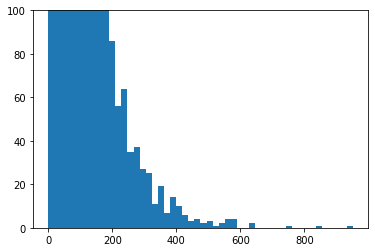

In [26]:
plt.hist(np.abs(model.coef_),bins=50)
plt.ylim(0,100)

In [24]:
np.max(np.abs(model.coef_))

951.1333757264705